Preprocessing

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

2023-08-19 10:14:08.594171: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory="/Users/QuangHoang/Documents/Potato_Disease/data",
    batch_size= BATCH_SIZE,
    image_size= (IMAGE_SIZE, IMAGE_SIZE)
)

Found 2152 files belonging to 3 classes.


In [45]:
class_names = dataset.class_names
class_names[0]

'Potato___Early_blight'

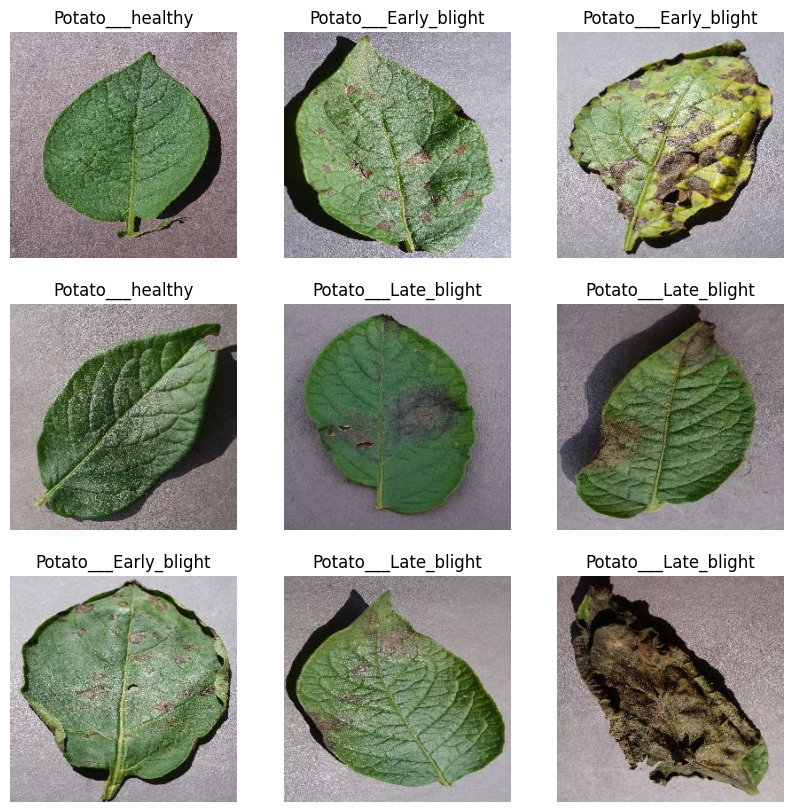

In [47]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
len(dataset) #=68 vi 32*68 = 2176

68

80% ==> training
20% ==> 10% validation, 10%test

In [ ]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54) #lay 54 du lieu dau trong moi batch
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54) #lay 68-54=14 du lieu con lai trong moi batch
len(test_ds)

14

In [14]:
#ham chia du lieu
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(ds_size * train_split)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)

    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
train_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

In [18]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [19]:
data_augumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

Build model CNN

In [20]:
n_classes = 3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32, kernel_size = (3,3), activation="relu", input_shape =input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax")
])

model.build(input_shape = input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [22]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ["accuracy"]
)

In [26]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50


8/8 [==============================] - 11s 1s/step - loss: 0.1658 - accuracy: 0.9336 - val_loss: 0.2344 - val_accuracy: 0.9062
Epoch 2/50
8/8 [==============================] - 10s 1s/step - loss: 0.1033 - accuracy: 0.9570 - val_loss: 0.3048 - val_accuracy: 0.9115
Epoch 3/50
8/8 [==============================] - 10s 1s/step - loss: 0.1105 - accuracy: 0.9570 - val_loss: 0.1715 - val_accuracy: 0.9323
Epoch 4/50
8/8 [==============================] - 10s 1s/step - loss: 0.0635 - accuracy: 0.9727 - val_loss: 0.3479 - val_accuracy: 0.8854
Epoch 5/50
8/8 [==============================] - 10s 1s/step - loss: 0.0441 - accuracy: 0.9844 - val_loss: 0.1794 - val_accuracy: 0.9323
Epoch 6/50
8/8 [==============================] - 10s 1s/step - loss: 0.0325 - accuracy: 0.9922 - val_loss: 0.2332 - val_accuracy: 0.9323
Epoch 7/50
8/8 [==============================] - 10s 1s/step - loss: 0.0464 - accuracy: 0.9727 - val_loss: 0.1670 - val_accuracy: 0.9323
Epoch 8/50
8/8 [=============================

In [27]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 252ms/step - loss: 0.2195 - accuracy: 0.9440


In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 8}

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

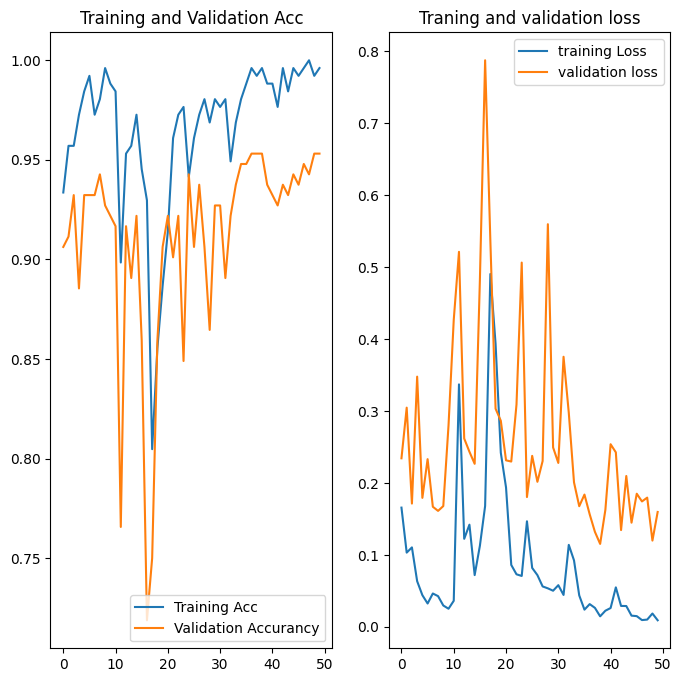

In [37]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = "Training Acc")
plt.plot(range(EPOCHS), val_acc, label="Validation Accurancy")
plt.legend(loc ='lower right')
plt.title('Training and Validation Acc')

plt.subplot(1,2, 2)
plt.plot(range(EPOCHS), loss, label = "training Loss")
plt.plot(range(EPOCHS), val_loss, label ="validation loss")
plt.legend(loc ="upper right")
plt.title('Traning and validation loss')

plt.show()




first image to pridict
actual label:  Potato___Late_blight
1/1 [==============================] - 0s 347ms/step
Label predict:
Potato___Late_blight


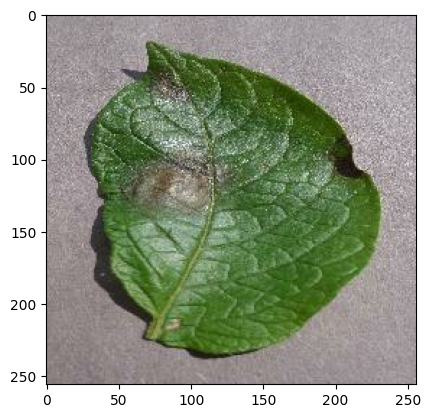

In [46]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to pridict")
    plt.imshow(first_image)
    print("actual label: ", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Label predict:")
    print(class_names[np.argmax(batch_prediction[0])])

In [53]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch

    predictions = model.predict(img_array)

    predictied_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predictied_class, confidence

1/1 [==============================] - 0s 63ms/step


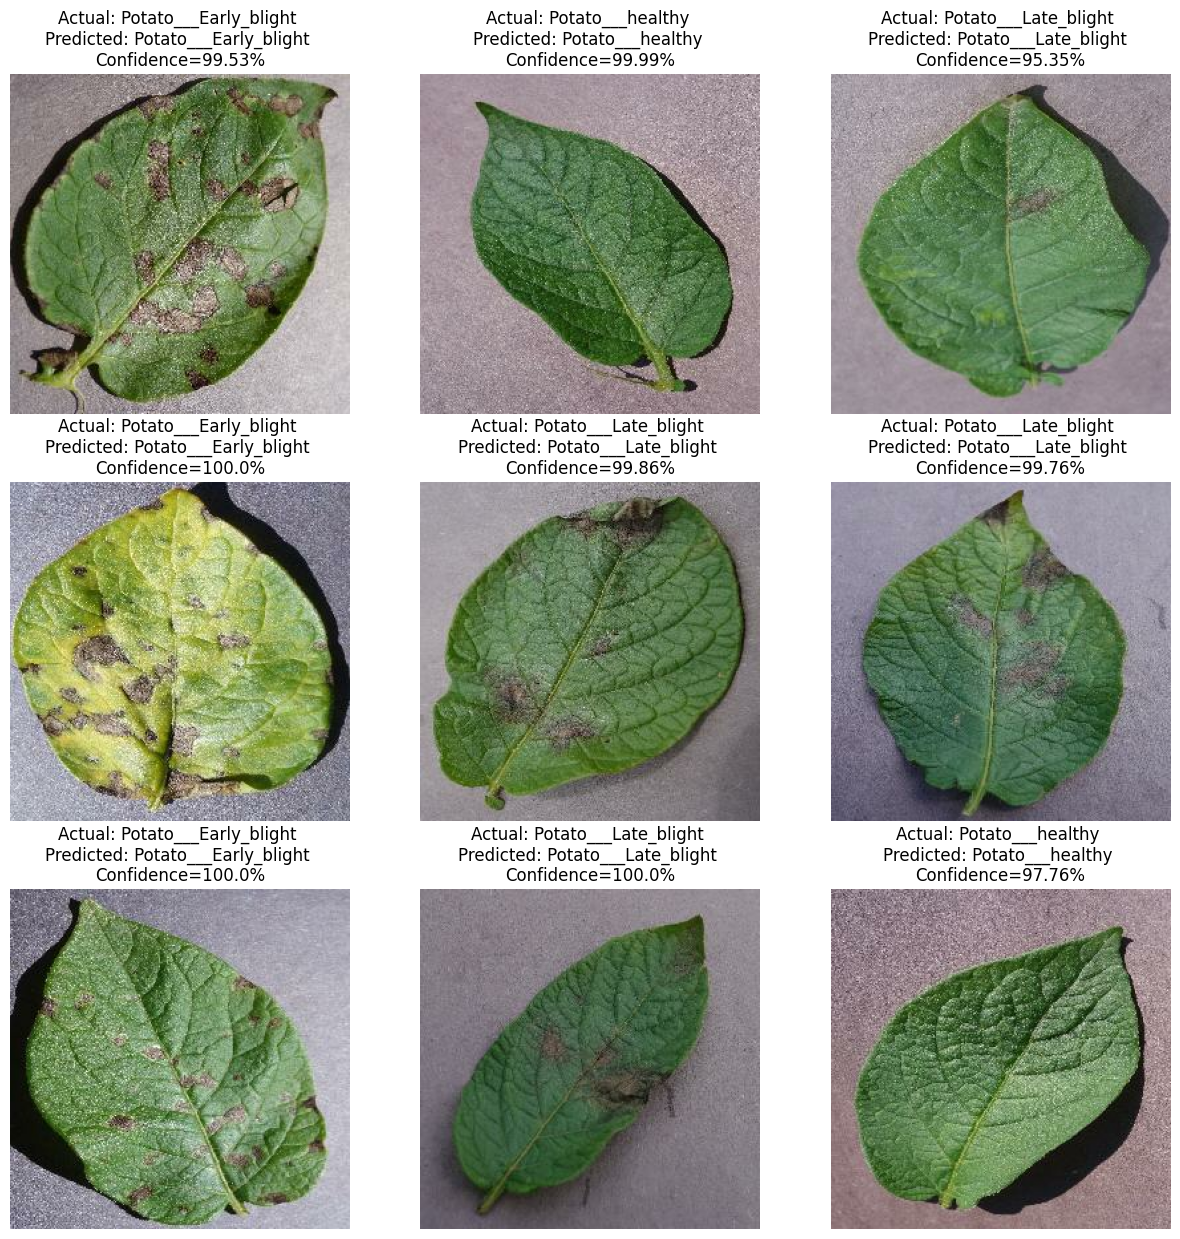

In [55]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class} \nPredicted: {predicted_class} \nConfidence={confidence}%")
        plt.axis("off")

In [59]:
model_version = 2
model.save(f"../model/{model_version}")

INFO:tensorflow:Assets written to: ../model/2/assets


INFO:tensorflow:Assets written to: ../model/2/assets
